# 415-HW1
## Shuo Han

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = {
    'Variable Name': ['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionDateTime', 'transactionAmount',
                      'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode',
                      'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
                      'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity', 'merchantState', 'merchantZip',
                      'cardPresent', 'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
    'Data Type': ['int64', 'int64', 'float64', 'float64', 'object', 'float64', 'object', 'object', 'object', 'float64', 'float64', 'object',
                  'object', 'object', 'object', 'int64', 'int64', 'int64', 'object', 'float64', 'float64', 'float64', 'float64', 'float64',
                  'bool', 'float64', 'float64', 'bool', 'bool'],
    'Description': ['A unique identifier for the account associated with the transaction',
                    'A unique identifier for the customer associated with the transaction',
                    'The maximum amount of credit available to the customer on their account',
                    'The amount of credit available to the customer at the time of the transaction',
                    'The date and time of the transaction',
                    'The amount of the transaction',
                    'The name of the merchant where the transaction took place',
                    'The country where the acquiring bank is located',
                    'The country where the merchant is located',
                    'The method used by the customer to enter their payment card information during the transaction',
                    'The condition of the point-of-sale terminal at the time of the transaction',
                    'The category of the merchant where the transaction took place',
                    'The expiration date of the customer\'s payment card',
                    'The date the customer\'s account was opened',
                    'The date the customer\'s address was last updated',
                    'The three-digit CVV code on the back of the customer\'s payment card',
                    'The CVV code entered by the customer during the transaction',
                    'The last four digits of the customer\'s payment card',
                    'The type of transaction',
                    'An internal variable used by the financial institution',
                    'The current balance on the customer\'s account',
                    'The city where the merchant is located',
                    'The state where the merchant is located',
                    'The ZIP code where the merchant is located',
                    'Whether or not the customer\'s payment card was present at the time of the transaction',
                    'Whether or not the transaction took place on the merchant\'s premises',
                    'Whether or not the transaction was a recurring payment',
                    'Whether or not the expiration date of the payment card was entered correctly during the transaction',
                    'Whether or not the transaction was fraudulent']
}

df = pd.DataFrame(data)

# for i in range(len(df)):
#     line = df.iloc[i]
#     print("|", line["Variable Name"], "|", line["Data Type"], "|", line["Description"], "|")

|Variable Name| Data Type | Description |
|---|---|---|
| accountNumber | int64 | A unique identifier for the account associated with the transaction |
| customerId | int64 | A unique identifier for the customer associated with the transaction |
| creditLimit | float64 | The maximum amount of credit available to the customer on their account |
| availableMoney | float64 | The amount of credit available to the customer at the time of the transaction |
| transactionDateTime | object | The date and time of the transaction |
| transactionAmount | float64 | The amount of the transaction |
| merchantName | object | The name of the merchant where the transaction took place |
| acqCountry | object | The country where the acquiring bank is located |
| merchantCountryCode | object | The country where the merchant is located |
| posEntryMode | float64 | The method used by the customer to enter their payment card information during the transaction |
| posConditionCode | float64 | The condition of the point-of-sale terminal at the time of the transaction |
| merchantCategoryCode | object | The category of the merchant where the transaction took place |
| currentExpDate | object | The expiration date of the customer's payment card |
| accountOpenDate | object | The date the customer's account was opened |
| dateOfLastAddressChange | object | The date the customer's address was last updated |
| cardCVV | int64 | The three-digit CVV code on the back of the customer's payment card |
| enteredCVV | int64 | The CVV code entered by the customer during the transaction |
| cardLast4Digits | int64 | The last four digits of the customer's payment card |
| transactionType | object | The type of transaction |
| echoBuffer | float64 | An internal variable used by the financial institution |
| currentBalance | float64 | The current balance on the customer's account |
| merchantCity | float64 | The city where the merchant is located |
| merchantState | float64 | The state where the merchant is located |
| merchantZip | float64 | The ZIP code where the merchant is located |
| cardPresent | bool | Whether or not the customer's payment card was present at the time of the transaction |
| posOnPremises | float64 | Whether or not the transaction took place on the merchant's premises |
| recurringAuthInd | float64 | Whether or not the transaction was a recurring payment |
| expirationDateKeyInMatch | bool | Whether or not the expiration date of the payment card was entered correctly during the transaction |
| isFraud | bool | Whether or not the transaction was fraudulent |

## 1 data quality checks

In [3]:

# 1 data quality checks
ccf = pd.read_csv('CreditCardFraud.csv')

# identify duplicated columns
dc = ccf.columns[ccf.columns.duplicated()]
print('Duplicated columns:', dc)

# columns with entirely missing data
mc = ccf.columns[ccf.isnull().all()]
print('Missing columns:', mc)
ccf.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1, inplace=True)

Duplicated columns: Index([], dtype='object')
Missing columns: Index(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip',
       'posOnPremises', 'recurringAuthInd'],
      dtype='object')


In this part, we have identified duplicated columns and columns with entirely missing data and printed the results above. And we can see that there is no duplicated columns in the dataset, and there are 6 colums with entirely missing data. For these data with entirely missing values, I haved deleted them all, since they are not of value for our future analysis with no information shown.

## 2 outliers in numerical variables

In [4]:
# 2 outliers in numerical variables
nc = ccf.select_dtypes(include=[np.number]).columns

# z-score
for col in nc:
    cz = col + '_zscore'
    ccf[cz] = (ccf[col] - ccf[col].mean()) / ccf[col].std(ddof=0)
outliers = ccf[(ccf.filter(regex='_zscore').gt(3) | ccf.filter(regex='_zscore').lt(-3)).any(axis=1)]

numOut = len(outliers)
print("Number of outliers:", numOut)
numCCF = len(ccf)
print("Number of data:", numCCF)
ccf = ccf.drop(outliers.index)

Number of outliers: 101434
Number of outliers: 786363


Outliers can have a significant impact on the estimation of summary statistics such as the mean and standard deviation, resulting in biased estimates. Additionally, outliers can affect regression analysis by altering the regression coefficients and leading to erroneous conclusions regarding the relationships between variables. Thus, it is necessary to detect outliers in our dataset.
Right here, I have used z-score for detecting. With a absolute value of z-score 3 as a threshold, we can detect there are 101434 rows with outliers in numerical variables.
Outliers can influence the estimation of summary statistics and regression coefficients, leading to biased results and incorrect conclusions. Since the primary goal of the assignment is to gain insights into the predictors of credit card fraud, which is an important problem in the financial industry, removing them can help to improve the accuracy of statistical inference. Also, compared to the length of the orignial dataset 786363, number of rows with outliers 786363 is only a small portion. And we will be identifying multiple-swipe transactions later, so this may lead to much more multiple-swipe transactions. Thus, I drop these rows with outliers here.

## 3 Identify columns with missing values

In [5]:
# 3 Identify columns with missing values
missing = ccf.columns[ccf.isnull().any()]
print('Columns with missing values:', missing)
ccf.dropna(subset=['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'transactionType', 'posEntryMode_zscore', 'posConditionCode_zscore'], inplace=True)

Columns with missing values: Index(['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'transactionType', 'posEntryMode_zscore', 'posConditionCode_zscore'],
      dtype='object')


There are 7 columns shown above with missing values. However, these columns are all for categorical variables, so we cannot replace these with the median or mean values. Thus, I will drop these rows with missing values.

## 4 Investigate the time variables

In [6]:
# 4 Investigate the time variables
ccf['transactionDateTime'] = pd.to_datetime(ccf['transactionDateTime'])
ccf['transactionDateTime'] = ccf['transactionDateTime'].apply(
    lambda x: int(pd.to_datetime(x).timestamp())
)
ccf['currentExpDate'] = pd.to_datetime(ccf['currentExpDate'])
ccf['currentExpDate'] = ccf['currentExpDate'].apply(
    lambda x: int(pd.to_datetime(x).timestamp())
)
ccf['accountOpenDate'] = pd.to_datetime(ccf['accountOpenDate'])
ccf['accountOpenDate'] = ccf['accountOpenDate'].apply(
    lambda x: int(pd.to_datetime(x).timestamp())
)

There are 3 time variables transactionDateTime, currentExpDate, and accountOpenDate here in the dataset. Since the type of these variables is all object, so we can convert values in these 3 columns here to the type of datetime first. However, since we need to do trasaction time comparisons and so on later, I did a further conversion from type datatime to second.

## 5 special treatment for some columns in the dataset

In [7]:
# 5 special treatment for some columns in the dataset
# integrate 'matchCVV' and 'cardCVV'
ccf['matchCVV'] = (ccf['cardCVV'] == ccf['enteredCVV']).astype(int)

# integrate "cardLast4Digits"
print(ccf['cardLast4Digits'].dtype)
ccf['cardLast4Digits'] = ccf['cardLast4Digits'].astype(str)
ccf['cardLast4Digits'] = ccf['cardLast4Digits'].apply(lambda x: '{:04d}'.format(int(x[-4:])) if len(x) > 4 else x)

int64


The column cardCVV and enteredCVV are not of statistical value itself. However due to their unique characteristics, we can do special treatment by comparing the cardCVV and the enteredCVV to see whether the CVV are match, which means the customer entered the correct CVV. 
For the colums cardLast4Digits, as the name of the variable, there should be 4 digits in the variable. I have converted the intgerger in this comlumn into a string, and then I have done further cutoff or added a space to every string. Then, we get a further conversion from a string of length 4 to a integer column.

In [8]:
# copy for q13
ccf2 =ccf

## 6 Analyze the relationship

   isFraud  matchCVV   count
0    False         0    5884
1    False         1  660665
2     True         0     166
3     True         1    9676


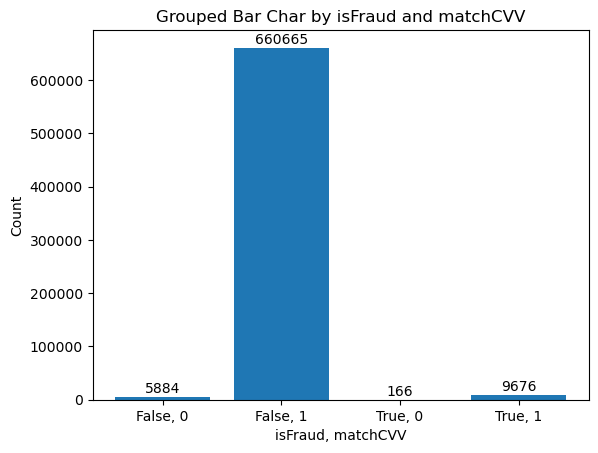

In [9]:
# 6 Analyze the relationship
groupData = ccf.groupby(['isFraud', 'matchCVV']).size().reset_index(name='count')
print(groupData)

# grouped bar chart
plt.bar(range(len(groupData)), groupData['count'])
plt.xticks(range(len(groupData)), [f"{i[0]}, {i[1]}" for i in groupData[['isFraud', 'matchCVV']].values])
for i, v in enumerate(groupData['count']):
    plt.text(i, v+15000, str(v), ha='center', va='center')
plt.xlabel('isFraud, matchCVV')
plt.ylabel('Count')
plt.title('Grouped Bar Char by isFraud and matchCVV')
plt.show()

By grouping the value of isFraud and matchCVV here, we can see there are 4 types of transactions. Most of these transactions are not fraud and with matched CVV entered to the correct CVV. And then there are some fraud transactions with matched CVV, some transaction not fraud with not matched CVV. The amount of transaction that are fraud with not matched CVV is of the least amount. 

From this plot we can see that there are more not-fraud transactions than fraud transaction, and there are more matched-CVV transactions than not-matched-CVV transactions. Thus, there is not a obvious relationship between the variable isFraud and matchCVV.

## 7 Visualize the distribution of transactionAmount

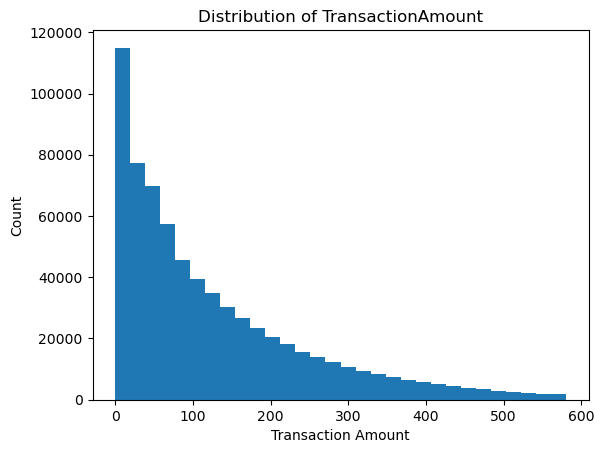

In [10]:
# 7 Visualize the distribution of transactionAmount
plt.hist(ccf['transactionAmount'], bins=30)
plt.title('Distribution of TransactionAmount')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

Provide a brief analysis of the observed pattern and discuss any insights or trends you can infer from the visualization.

I have visualized the distribution of transactionAmount using a histogram. There is a downwrd trend in the histogram, which means there is a negative correlation between the number of transaction amount and the number of transaction, which means there are more transactions with less transaction amount, and less transactions with more transaction amount. 

For this trend, a possible explaination may be that most of the credit card users are individuals or small businesses with limited capital, which is reflected in these transactions here. Also, there could be transaction amount limits omposed by financial institutions, which is further reflected in this pattern.

## 8 bar charts to display the fraud rate for each category 

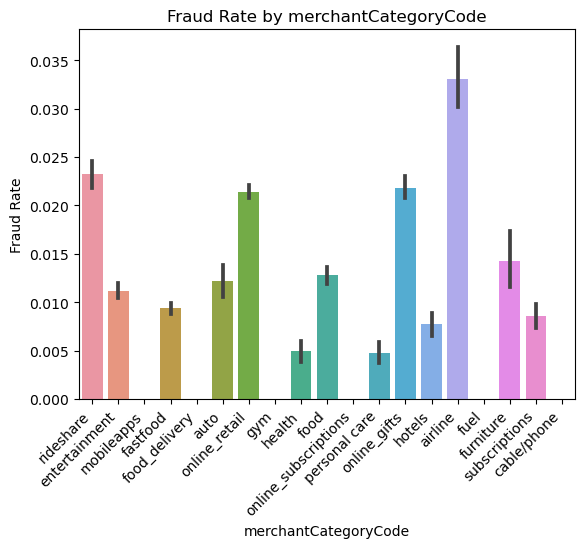

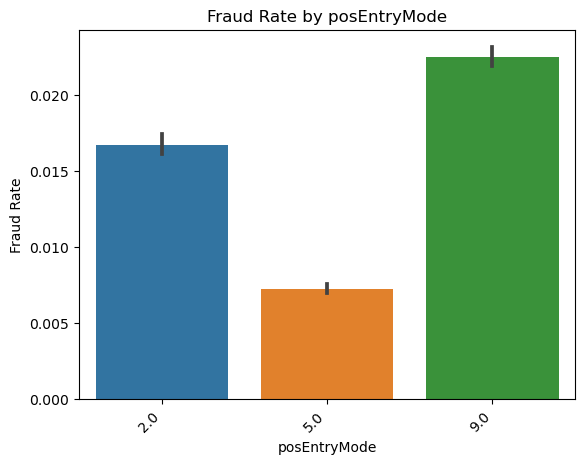

KeyboardInterrupt: 

In [11]:
# 8 bar charts to display the fraud rate for each category
cateP = ['merchantCategoryCode', 'posEntryMode', 'transactionType', 'posConditionCode', 'merchantCountryCode']
for p in cateP:
    sns.barplot(x=p, y='isFraud', data=ccf)
    plt.title('Fraud Rate by ' + p)
    plt.xlabel(p)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Fraud Rate')
    plt.show()

I have visualized the relationship between isFraud and categorical predictors merchantCategoryCode, posEntryMode, transactionType, posConditionCode, and merchantCountryCode, by creating bar charts here to display the fraud rate for each category of categorical variables. For there categorical variables, we can see that there are obvious fraud rate between these categories of categorical predictors merchantCategoryCode, posEntryMode, transactionType, posConditionCode, and merchantCountryCode.
From the histogram of merchantCategoryCode, we can see that the fraud rate of merchant category airline, rideshare, online retails, which is of high transaction volume, lack of verification, more online transactions, and limited customer information, so there are more fraud happening in these merchant categories.
From the histogram of posEntryMode, we can see that the fraud rate of the method used by the customer to enter their payment card information during the transaction represented by 9.0 PAN entry via electronic commerce, including remote chip, is greater than that of 2.0 PAN auto-entry via magnetic stripe, and 5.0 integrated circuit card read with card data reliable. Thus, we can see that more fraud will happen when the customer does not enter their payment card information online or in a less reliable way without enough verification for ohysical cards. This also corresponds to the histogram of merchantCategoryCode.
From the histogram of transactionType, we can see that the fraud rate of purchase and reversal are of higher fraud rate than address verification transactions. The reason may be that purchase and reversal transactions are of higher risk and with higher profit than address verification.
From the histogram of posConditionCode, we can see that the fraud rate of 1.0 the terminal is in normal working condition and functioning properly at the time of the transaction than the fraud rate 8.0 the transaction was approved online. This also corresponds to histograms above, since the 8.0 transaction is of more reliability with online approvement than a normal pos checking.
From the histogram of merchantCountryCode, we can see that the fraud rates of CAN Canada, MEX Mexico, PR Puerto Rico, and US United States are listed in descending order. This may result from less effective fraud prevention measures and less developed economic conditions, which may lead to more fraud happening.

## 9 explore the relationship between isFraud and transactionType conditioned on merchantCategoryCode

In [ ]:
# 9 explore the relationship between isFraud and transactionType conditioned on merchantCategoryCode
# grouped bar chart to display the fraudulent rates by merchant category code and transaction type
groupMTD = ccf.groupby(['merchantCategoryCode', 'transactionType'])['isFraud'].mean().reset_index()

# Create grouped bar chart
sns.barplot(x='merchantCategoryCode', y='isFraud', hue='transactionType', data=groupMTD)
plt.xlabel('Merchant Category Code')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rates by Merchant Category Code and Transaction Type')
plt.legend(title='Transaction Type', loc='upper right')
plt.show()

Corresponding to our results above, we can see there are higher fraud rates in airline, rideshare, and online gifts, and given every merchant category, there are higher fraud rate in purchse and reversal transactions than address verification transaction.

## 10 Construct conditional probability density plots for the numerical variables

In [ ]:
# 10 Construct conditional probability density plots for the numerical variables
numV = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
for v in numV:
    fig, ax = plt.subplots()
    sns.kdeplot(data=ccf[ccf['isFraud'] == 0], x=v, fill=True, alpha=0.5, ax=ax, label='Not Fraud')
    sns.kdeplot(data=ccf[ccf['isFraud'] == 1], x=v, fill=True, alpha=0.5, ax=ax, label='Fraud')
    ax.set_title(f"{v.capitalize()} Distribution by Fraud")
    ax.set_xlabel(v)
    ax.set_ylabel('Density')
    ax.legend()
    plt.show()

From the density plot above, we can see than there is a downward in plots of available money, transaction amount, and current balance by fraud. This means, as the available money, transaction amount, and current balance increase, the fraud rate tends to decrease. In the first density plot of creditlimit distribution, we can see that there are more fraud transaction account with rounded credit limit since there are several peaks in the plot at rounded credit limit. This may because banks tends to assigned roundedcredit values. Also, the maximum fraud rate is at 5000, which means more fraud transaction account tends to be with 5000 credit limit, since these may be more likely to be personal accounts with less information proctection procedures. 

## 11 identify multi-swipe transactions

In [ ]:
# 11 identify multi-swipe transactions
ccf = ccf.sort_values(by='transactionDateTime')
ccf['multi_swipe'] = False

# identify multi-swipe transactions
for i in range(0, len(ccf)-2):
    prev = ccf.iloc[i]
    cur = ccf.iloc[i+1]
    if (prev['transactionAmount'] == cur['transactionAmount']) \
            and ((cur['transactionDateTime'] - prev['transactionDateTime']) <= 180):
        ccf.loc[i+1, 'multi_swipe'] = True

# Estimate the percentage of multi-swipe transactions
mPer = ccf['multi_swipe'].sum() / len(ccf) * 100
print(f"Percentage of multi-swipe transactions: {mPer:.2f}%")

# Estimate the percentage of the total dollar amount for these transactions
mAmo = ccf[ccf['multi_swipe']]['transactionAmount'].sum()
tAmo = ccf['transactionAmount'].sum()
tPer = mAmo / tAmo * 100
print(f"Percentage of the total dollar amount for multi-swipe transactions: {tPer:.2f}%")

I have chosed conditions same transaction amount and transaction time of two transactions processed within 3 minutes to identify multi-swipe transactions. 
The estimated percentage of multi-swipe transactions is 0.51% as shows above, and the percentage of the total dollar amount for these transactions is 0.44% as shows above, excluding the first "normal" transaction from the count. Discuss any interesting findings or patterns that emerge from your analysis of multi-swipe transactions and their conditions. Since the percentage of multi-swipe transactions is a little larger than the percentage of the total dollar amount for multi-swipe transactions, so these multi-swipe transactions are of relatively less dollar amount than the average level. 

## 12 Examine the class imbalance in the isFraud outcome variable

In [ ]:
# 12 Examine the class imbalance in the isFraud outcome variable
fCount = ccf['isFraud'].sum()
print('Number of fraud transactions:', fCount)
nCount = len(ccf) - fCount
print('Number of normal transactions:', nCount)

imbalance = fCount / len(ccf)
print('Class imbalance:', imbalance)

There are much more number of normal transactions than the number of fraud transactions, so we can see that the fraud class has only about 1.5% of the examples in the dataset, so there is an oversampling problem.
When striving for higher accuracy in machine learning models, the majority class is typically favored over the minority class. This preference can have adverse effects on the performance of the minority class, leading to decreased precision, recall, and F1 scores. Moreover, in some instances, the minority class may be completely disregarded, introducing biases and inaccuracies into the predictions. However, we are really interested in the fraud class, so there is a problem of the class imbalance in the isFraud outcome variable.

## 13 Implement a method to mitigate class imbalance in the isFraud outcome variable

In [ ]:
# 13 Implement a method to mitigate class imbalance in the isFraud outcome variable
nF = ccf2.drop('isFraud', axis=1)
iF = ccf2['isFraud']

ros = RandomOverSampler(random_state=0)
sN, sI = ros.fit_resample(nF, iF)

fCount = sum(sI)
nCount = len(sI) - fCount
print('Number of fraud transactions after SMOTE:', fCount)
print('Number of normal transactions after SMOTE:', nCount)

resampled = pd.DataFrame(sN, columns=nF.columns)
resampled['isFraud'] = sI

I have used random oversampling to balance an imbalanced dataset here. We split the dataset into the features (nF) and the target (iF), and we create a RandomOverSampler object (ros) with a random seed of 0, and apply it to the features (nF) and the target (iF) using the fit_resample() function, which returns the resampled features (sN) and target (sI) as numpy arrays. And the number of fraud and normal transactions in the resampled dataset (sI) are shown above. Then we combine the resampled features (sN) and target (sI) into a pandas DataFrame with the same columns as the original dataset. The resulting DataFrame resampled contains the resampled data.
Addressing class imbalance will improve the effectiveness and performance of a predictive model for credit card fraud detection by reducing bias, improving accuracy, reducing false negatives, increasing precision, and reducing overfitting.